In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
from IPython.display import display
from uncertainties import umath as um
from uncertainties import unumpy as unp
import numpy as np
from uncertainties import ufloat

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Используем засечковый шрифт
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"""
        \usepackage[utf8]{inputenc}
        \usepackage[russian]{babel}
        \usepackage[T2A]{fontenc}
    """,
    "pgf.texsystem": "xelatex"
})

def calculate_r2(x, y):
    
    popt, pcov = curve_fit(lambda x,k,b: k*x+b, x,y)

    y_true = y 
    y_pred = popt[0]*x + popt[1]

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)


def linear(x, y, label="", **kwargs):
    """Perform linear regression and plot results"""
    # Convert pandas Series to numpy arrays
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    
    popt, pcov = curve_fit(lambda x, k, b: k*x + b, x, y)
    x_min = np.min(x)
    x_max = np.max(x)
    x_ax = np.linspace(x_min, x_max, 100)
    y_ax = popt[0] * x_ax + popt[1]
    
    R2 = calculate_r2(x, y)
    
    plt.scatter(x, y)
    plt.plot(x_ax, y_ax, label=f"{label} $R^2$ = {R2:.5f}", **kwargs)
    
    coefs = unp.uarray(popt, np.sqrt(np.diag(pcov)))
    
    return coefs

[61855.069976098115+/-2973.3504342023007
 -284.304060393693+/-9.56533466286653]
[61866.43184567735+/-2983.3786286361424
 -191.51810752404106+/-9.597595693489616]


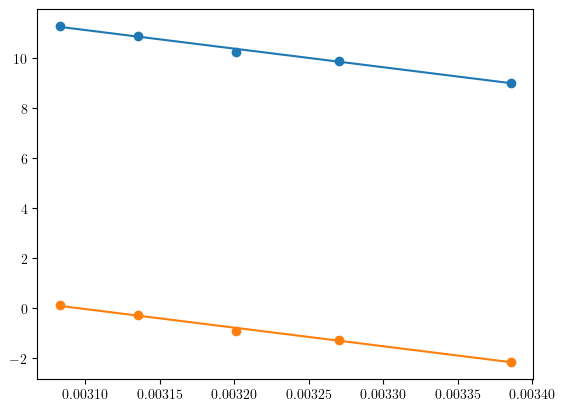

In [36]:

x = np.array([22.2,32.6,39.2,45.8,51.2])
x = 1 / (x + 273.15)

y1 = [9.022, 9.907, 10.247, 10.911, 11.286]
y2 = [-2.143, -1.257, -0.918, -0.254, 0.122]

coefs1 = linear(x, y1)
coefs2 = linear(x, y2)

print(-8.314*coefs1)
print(-8.314*coefs2)
